# Exam 1: Exgal Astronomy 403
##### Felix Martinez

In [336]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The file [lcparam_full_long.txt](https://github.com/dscolnic/Pantheon/blob/master/lcparam_full_long.txt) contains the following three columns: `zcmb`, `mb`, and `dmb`, which correspond to the ***redshift***, ***observed B-band magnitude***, and the ***error of the observed B-band magnitude*** of the Pantheon supernova Sample 

## Hubble Diagram
Draw the Hubble diagram using these data and their error bars, with the horizontal axis being the redshift z, the vertical axis being the distance modulus, defined as: 
$$
m_b – M_b = 5 \times \log_{10}\Big(\frac{D_L}{\text{Mpc}}\Big)+25
$$

For a Type Ia supernovae, $M_b$ = -19.3.

In [337]:
import pandas as pd
# first reading in the file
data = pd.read_csv("lcparam_full_long.txt", sep=" ")

# defining distance modulus
Mb = -19.3                        # (only for type 1a supernovea)
DM = data['mb'].to_numpy() - Mb

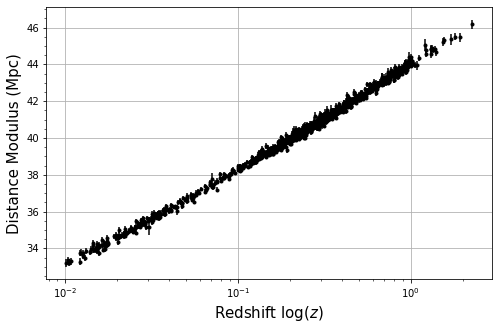

In [338]:
# creating the figure
plt.figure(figsize=[8,5])
plt.errorbar(x = data['zcmb'], y = DM, yerr = data['dmb'], fmt='.', color='black')
plt.grid()
plt.xlabel('Redshift $\log (z)$', size=15)
plt.ylabel('Distance Modulus (Mpc)', size=15)
plt.minorticks_on()
plt.xscale('log')
plt.savefig('Distance_modulus.png')
plt.show()

## Theoretical Distance Modulus Models
Over plot the corresponding theoretical distance modulus $\mu_{\text{LCDM}}$, assuming the following cosmological parameters:

* LCDM: $H_0 = 70$ km/sec, $\Omega_M = 0.3$, $\Omega_\Lambda = 0.7$
* LCDM: $H_0 = 70$ km/sec, $\Omega_M = 1.0$, $\Omega_\Lambda = 1.0$
* LCDM: $H_0 = 70$ km/sec, $\Omega_M = 0.3$, $\Omega_\Lambda = 0.0$

#### Distance Modulus:
*(equation 6.49 in Ryden)*
$$
m - M = 5\log_{10}\Big(\frac{d_L}{1 \text{ Mpc}}\Big) + 25
$$

#### Luminosity Distance:
*(equation 6.31 in Ryden)*
$$
d_L \approx \frac{c}{H_0}z\Big(1+\frac{(1-q_0)}{2}z\Big)
$$

#### Deceleration parameter: 
*(equation 6.11 in Ryden)*
$$
q_0 = \frac{1}{2}\Omega_{M,0}-\Omega_{\Lambda,0}
$$

In [339]:
c = 3e8 # speed of light constant

# Defining our equations
def q0(Om, Ol): # equation 6.11 in text
    return (1/2) * Om - Ol

def d_l(x, H0, Om, Ol): # equation 6.31 in text
    return ((c*x)/H0) * (1 + (1-q0(Om, Ol)) * x/2)

def distance_modulus(x, H0, Om, Ol): # equation 6.49 in text
    return(5*np.log10(d_l(x, H0, Om, Ol))) + 25

In [340]:
# making our models
LCDM1 = distance_modulus(data['zcmb'], 70000, 0.3, 0.7)
LCDM2 = distance_modulus(data['zcmb'], 70000, 1.0, 1.0)
LCDM3 = distance_modulus(data['zcmb'], 70000, 0.3, 0)

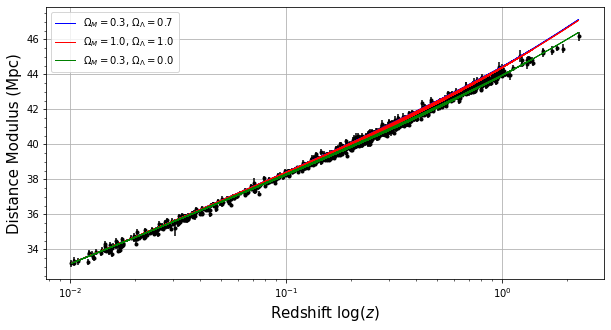

In [341]:
# creating the figure
plt.figure(figsize=[10,5])

#plotting the data
plt.errorbar(x = data['zcmb'], y = DM, yerr = data['dmb'], fmt='.', color='black') # raw data

# models
plt.errorbar(data['zcmb'],LCDM1,label = '$\Omega_M = 0.3$, $\Omega_\Lambda = 0.7$ ',linewidth=1,color='blue')
plt.errorbar(data['zcmb'],LCDM2,label = '$\Omega_M = 1.0$, $\Omega_\Lambda = 1.0$ ',linewidth=1,color='red')
plt.errorbar(data['zcmb'],LCDM3,label = '$\Omega_M = 0.3$, $\Omega_\Lambda = 0.0$ ',linewidth=1,color='green')

# making it pretty
plt.grid()
plt.xlabel('Redshift $\log (z)$', size=15)
plt.ylabel('Distance Modulus (Mpc)', size=15)
plt.minorticks_on()
plt.legend()
plt.xscale('log')
plt.savefig('Distance_modulus_functions.png')
plt.show()

### Showing the Residuals
Make the figures showing the difference of the distance modulus ($m_b – \mu_{\text{LCDM}}$) vs $z_\text{cmb}$.

In [300]:
# computing the residuals
resid1 = DM - LCDM1
resid2 = DM - LCDM2
resid3 = DM - LCDM3

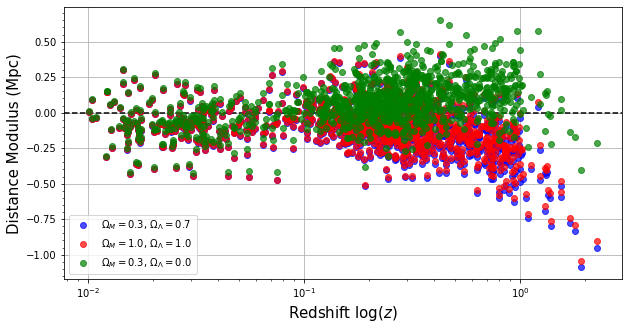

In [301]:
# creating the figure
plt.figure(figsize=[10,5])

# plotting the data (residuals)
plt.errorbar(data['zcmb'], resid1, label = '$\Omega_M = 0.3$, $\Omega_\Lambda = 0.7$ ', alpha = 0.7, 
             color='blue', fmt='o')
plt.errorbar(data['zcmb'], resid2, label = '$\Omega_M = 1.0$, $\Omega_\Lambda = 1.0$ ', alpha = 0.7, 
             color='red', fmt='o')
plt.errorbar(data['zcmb'], resid3, label = '$\Omega_M = 0.3$, $\Omega_\Lambda = 0.0$ ', alpha = 0.7, 
             color='green', fmt='o')

# making it pretty
plt.grid()
plt.axhline(0, c='black',linestyle='--')
plt.xlabel('Redshift $\log (z)$', size=15)
plt.ylabel('Distance Modulus (Mpc)', size=15)
plt.minorticks_on()
plt.legend()
plt.xscale('log')
plt.savefig('residuals.png')
plt.show()

### Cosmological Redshift vs. Heliocentric Redshift

Explain why we should use `zcmb` for cosmological modeling, not the redshifts measured in the heliocentric reference system (`zhel` in the data file).

-------------------------

`zhel` is a measured redshift in the heliocentric frame, meaning it includes the redshift caused by our motion around the sun and around the Milky Way. `zcmb`, on the other hand, is the "corrected" redshift that removes this bias of motion and instead is a better measurment of the true cosmological distance an object is away from us. We use `zcmb` in cosmological modeling because it is more accurate to the cosmologial distance than `zhel` (However for this dataset `zhel` is approximated to equal `zcmb` which is not always true).

### Chi-Squared

Write down the formula for calculating the Chi-Square of the differences between the data and the model, with the errors of the data points included.

-------------------------
$$
X^2 = \sum_i \frac{(\mu_i - \mu(z_i))^2}{a_i^2}
$$

Where $a_i^2$ is the error squared, $\mu_i$ are our observed values, and $\mu(z_i)$ are our expected values

## Modeling our Distance Modulus with emcee
#### Run cosmological fits using the program emcee to search for the parameters ($H_0$, $\Omega_M$, and $\Omega_\Lambda$) that will fit the data the best.

* Download emcee and use the tutorial to learn how it works using the demo problems shown in the tutorial document, make the corresponding demo figures.
* Derive the optimal fit using the LCDM model and derive the estimates of $H_0$, $\Omega_M$, and $\Omega_\Lambda$. 
* Show the corresponding corner plots of the results. 

---

### *Emcee Tutorial:* 

For this problem, we will be using the emcee tutorial from [readthedocs.io](https://emcee.readthedocs.io/en/stable/tutorials/line/).

#### *The generative probabilistic model:*

When you approach a new problem, the first step is generally to write down the *likelihood function* (the probability of a dataset given the model parameters). This is equivalent to describing the generative procedure for the data. In this case, we’re going to consider a linear model where the quoted uncertainties are underestimated by a constant fractional amount. You can generate a synthetic dataset from this model:

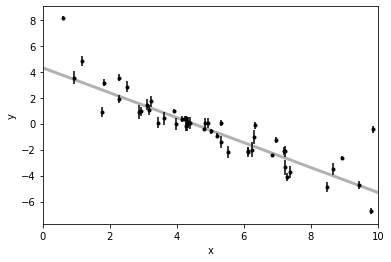

In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

The true model is shown as the thick grey line and the effect of the underestimated uncertainties is obvious when you look at this figure. The standard way to fit a line to these data (assuming independent Gaussian error bars) is linear least squares. Linear least squares is appealing because solving for the parameters—and their associated uncertainties—is simply a linear algebraic operation. Following the notation in [Hogg, Bovy & Lang (2010)](https://arxiv.org/abs/1008.4686), the linear least squares solution to these data is

Least-squares estimates:
m = -1.104 ± 0.016
b = 5.441 ± 0.091


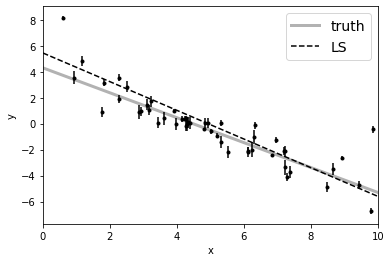

In [10]:
A = np.vander(x, 2)
C = np.diag(yerr * yerr)
ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
cov = np.linalg.inv(ATA)
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr ** 2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

This figure shows the least-squares estimate of the line parameters as a dashed line. This isn’t an unreasonable result but the uncertainties on the slope and intercept seem a little small (because of the small error bars on most of the data points).

#### *Maximum likelihood estimation:*

The least squares solution found in the previous section is the maximum likelihood result for a model where the error bars are assumed correct, Gaussian and independent. We know, of course, that this isn’t the right model. Unfortunately, there isn’t a generalization of least squares that supports a model like the one that we know to be true. Instead, we need to write down the likelihood function and numerically optimize it. In mathematical notation, the correct likelihood function is:

$$
\ln p(y | x,\sigma,m,b,f) =-\frac{1}{2}\sum_n\Big[\frac{(y_n - mx_n-b)^2}{s^2_n}+\ln(2\pi s^2_n)\Big]
$$

where

$$
s^2_n = \sigma^2_n + f^2(mx_n+b)^2.
$$

This likelihood function is simply a Gaussian where the variance is underestimated by some fractional amount: $f$. In Python, you would code this up as:

In [11]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr ** 2 + model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

In this code snippet, you’ll notice that we’re using the logarithm of $f$ instead of $f$ itself for reasons that will become clear in the next section. For now, it should at least be clear that this isn’t a bad idea because it will force $f$ to be always positive. A good way of finding this numerical optimum of this likelihood function is to use the [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html) module:

Maximum likelihood estimates:
m = -1.003
b = 4.528
f = 0.454


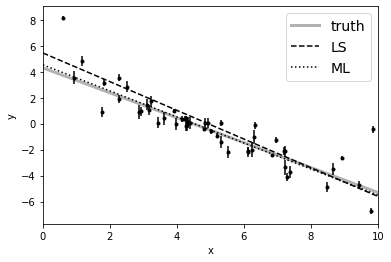

In [12]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda * args: -log_likelihood(*args)
initial = np.array([m_true, b_true, np.log(f_true)]) + 0.1 * np.random.randn(3)
soln = minimize(nll, initial, args=(x, y, yerr))
m_ml, b_ml, log_f_ml = soln.x

print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, np.dot(np.vander(x0, 2), w), "--k", label="LS")
plt.plot(x0, np.dot(np.vander(x0, 2), [m_ml, b_ml]), ":k", label="ML")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

It’s worth noting that the optimize module *minimizes* functions whereas we would like to maximize the likelihood. This goal is equivalent to minimizing the negative likelihood (or in this case, the negative log likelihood). In this figure, the maximum likelihood (ML) result is plotted as a dotted black line—compared to the true model (grey line) and linear least-squares (LS; dashed line). That looks better!

The problem now: how do we estimate the uncertainties on $m$ and $b$? What’s more, we probably don’t really care too much about the value of $f$ but it seems worthwhile to propagate any uncertainties about its value to our final estimates of $m$ and $b$. This is where MCMC comes in.

#### *Marginalization & uncertainty estimation:*

This isn’t the place to get into the details of why you might want to use MCMC in your research but it is worth commenting that a common reason is that you would like to marginalize over some “nuisance parameters” and find an estimate of the posterior probability function (the distribution of parameters that is consistent with your dataset) for others. MCMC lets you do both of these things in one fell swoop! You need to start by writing down the posterior probability function (up to a constant):

$$
p(m,b,f|x,y,\sigma) \propto p(m,b,f) p(y|x,\sigma,m,b,f).
$$

We have already, in the previous section, written down the likelihood function

$$
p(y|x,\sigma,m,b,f)
$$

so the missing component is the “prior” function

$$
p(m,b,f)
$$

This function encodes any previous knowledge that we have about the parameters: results from other experiments, physically acceptable ranges, etc. It is necessary that you write down priors if you’re going to use MCMC because all that MCMC does is draw samples from a probability distribution and you want that to be a probability distribution for your parameters. This is important: **you cannot draw parameter samples from your likelihood function**. This is because a likelihood function is a probability distribution **over datasets** so, conditioned on model parameters, you can draw representative datasets (as demonstrated at the beginning of this exercise) but you cannot draw parameter samples.

In this example, we’ll use uniform (so-called “uninformative”) priors on $m$, $b$ and the logarithm of $f$. For example, we’ll use the following conservative prior on $m$:

$$
p(m) = 
\begin{cases}
1/5.5, \  \text{if} -5<m<1/2 \\
0, \  \text{otherwise}
\end{cases}
$$

In code, the log-prior is (up to a constant):

In [13]:
def log_prior(theta):
    m, b, log_f = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < log_f < 1.0:
        return 0.0
    return -np.inf

Then, combining this with the definition of `log_likelihood` from above, the full log-probability function is:

In [14]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

After all this setup, it’s easy to sample this distribution using emcee. We’ll start by initializing the walkers in a tiny Gaussian ball around the maximum likelihood result (I’ve found that this tends to be a pretty good initialization in most cases) and then run 5,000 steps of MCMC.

In [15]:
import emcee

pos = soln.x + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x, y, yerr)
)
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [00:04<00:00, 1110.64it/s]


Let’s take a look at what the sampler has done. A good first step is to look at the time series of the parameters in the chain. The samples can be accessed using the `EnsembleSampler.get_chain()` method. This will return an array with the shape `(5000, 32, 3)` giving the parameter values for each walker at each step in the chain. The figure below shows the positions of each walker as a function of the number of steps in the chain:

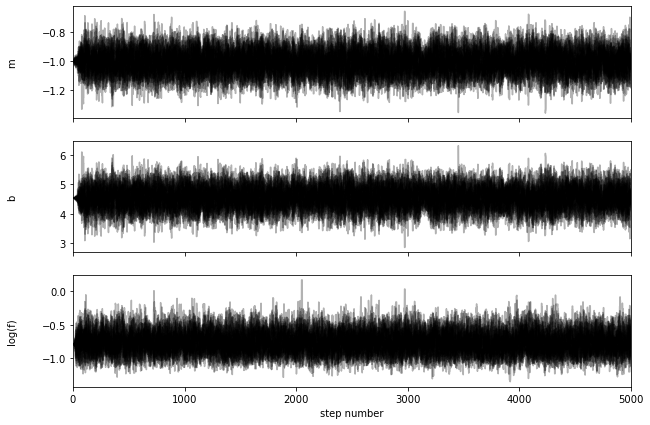

In [16]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["m", "b", "log(f)"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

As mentioned above, the walkers start in small distributions around the maximum likelihood values and then they quickly wander and start exploring the full posterior distribution. In fact, after fewer than 50 steps, the samples seem pretty well “burnt-in”. That is a hard statement to make quantitatively, but we can look at an estimate of the integrated autocorrelation time (see the [Autocorrelation analysis & convergence](https://emcee.readthedocs.io/en/stable/tutorials/autocorr/#autocorr) tutorial for more details

In [17]:
tau = sampler.get_autocorr_time()
print(tau)

[39.99526726 39.76501919 41.02623912]


This suggests that only about 40 steps are needed for the chain to “forget” where it started. It’s not unreasonable to throw away a few times this number of steps as “burn-in”. Let’s discard the initial 100 steps, thin by about half the autocorrelation time (15 steps), and flatten the chain so that we have a flat list of samples:

In [18]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 3)


#### *Results:*

Now that we have this list of samples, let’s make one of the most useful plots you can make with your MCMC results: a corner plot. You’ll need the [corner.py module](https://corner.readthedocs.io/en/latest/) but once you have it, generating a corner plot is as simple as:

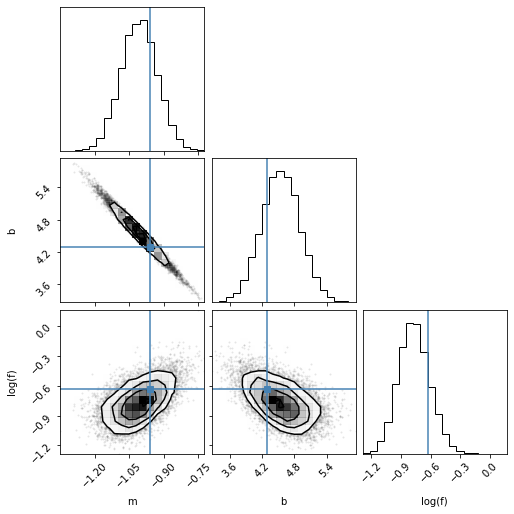

In [19]:
import corner

fig = corner.corner(
    flat_samples, labels=labels, truths=[m_true, b_true, np.log(f_true)]
);

The corner plot shows all the one and two dimensional projections of the posterior probability distributions of your parameters. This is useful because it quickly demonstrates all of the covariances between parameters. Also, the way that you find the marginalized distribution for a parameter or set of parameters using the results of the MCMC chain is to project the samples into that plane and then make an N-dimensional histogram. That means that the corner plot shows the marginalized distribution for each parameter independently in the histograms along the diagonal and then the marginalized two dimensional distributions in the other panels.

Another diagnostic plot is the projection of your results into the space of the observed data. To do this, you can choose a few (say 100 in this case) samples from the chain and plot them on top of the data points:

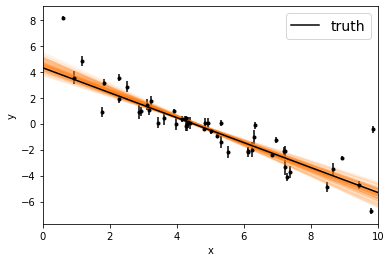

In [20]:
inds = np.random.randint(len(flat_samples), size=100)
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, np.dot(np.vander(x0, 2), sample[:2]), "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, m_true * x0 + b_true, "k", label="truth")
plt.legend(fontsize=14)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

This leaves us with one question: which numbers should go in the abstract? There are a few different options for this but my favorite is to quote the uncertainties based on the 16th, 50th, and 84th percentiles of the samples in the marginalized distributions. To compute these numbers for this example, you would run:

In [21]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### *Doing the Tutorial Ourselves*

We are going to have priors of our variables $H_0$,$\Omega_M$, and $\Omega_\Lambda$ to be:
* $H_0$ : [50-80]
* $\Omega_M$: [0-1]
* $\Omega_\Lambda$: [0,1]

In [263]:
c = 3e8 # speed of light constant

# Defining our equations
def q0(Om, Ol): # equation 6.11 in text
    return (1/2) * Om - Ol

def d_l(x, H0, Om, Ol): # equation 6.31 in text
    return ((c*x)/H0) * (1 + (1-q0(Om, Ol)) * x/2)

def distance_modulus(x, H0, Om, Ol): # equation 6.49 in text
    return(5*np.log10(d_l(x, H0, Om, Ol))) + 25

In [264]:
# importing packages
import lmfit
import emcee

# Recall our old distance_modulus equation used in part b
model = lmfit.Model(distance_modulus)

# inital conditions of what we thing our best fit is
p = model.make_params(H0=70000, Om=0.3, Ol=0.7)

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 182
    # data points      = 1048
    # variables        = 3
    chi-square         = 23.9561201
    reduced chi-square = 0.02292452
    Akaike info crit   = -3953.77896
    Bayesian info crit = -3938.91504
[[Variables]]
    H0:  69861.7591 +/- 188.269924 (0.27%) (init = 70000)
    Om:  0.40327908 +/- 212.504432 (52694.14%) (init = 0.3)
    Ol:  0.31180548 +/- 106.261957 (34079.57%) (init = 0.7)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om, Ol) = 1.000
    C(H0, Ol) = 0.675
    C(H0, Om) = 0.675


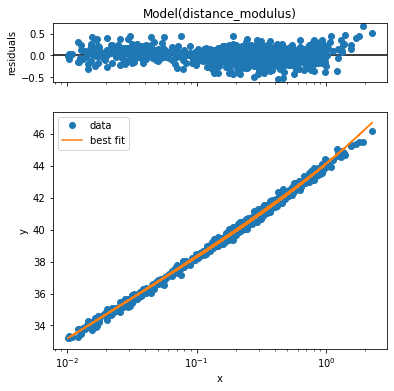

In [265]:
# fitting our model with the Nelder method
result = model.fit(data=DM, params=p, x=data['zcmb'], method='Nelder', nan_policy='omit')

# graphing the results
lmfit.report_fit(result)
result.plot()
plt.xscale('log')

In [321]:
# conditions in running emcee
emcee_kws = dict(steps=5000, burn=500, thin=20, is_weighted=False,
                 progress=True)

# copying the results of our first fit to emcee
emcee_params = result.params.copy()

# adding constraints to our initial conditions
emcee_params.add('__lnsigma', value=np.log(0.1), min=np.log(0.001), max=np.log(2.0))
emcee_params.add('H0', value=result.params.copy()['H0'].value, min=60000, max=80000)
emcee_params.add('Om', value=result.params.copy()['Om'].value, min=0, max=1)
emcee_params.add('Ol', value=result.params.copy()['Ol'].value, min=0, max=1)
#emcee_params.add('Ol', value=result.params.copy()['Ol'].value, expr='delta-Om')
#emcee_params.add('delta', value = 1, max = 1)

In [330]:
emcee_params

name,value,initial value,min,max,vary
H0,69861.7591,69861.75907907491,60000.0000,80000.0000,True
Om,0.40327908,0.4032790783304212,0.00000000,1.00000000,True
Ol,0.31180548,0.31180548078890913,0.00000000,1.00000000,True
__lnsigma,-2.30258509,-2.3025850929940455,-6.90775528,0.69314718,True


In [322]:
result_emcee = model.fit(data=DM, x=data['zcmb'], params=emcee_params, method='emcee',
                         nan_policy='omit', fit_kws=emcee_kws)

100%|██████████| 5000/5000 [00:29<00:00, 169.79it/s]


In [323]:
lmfit.report_fit(result_emcee)

[[Fit Statistics]]
    # fitting method   = emcee
    # function evals   = 500000
    # data points      = 1048
    # variables        = 4
    chi-square         = 1044.72461
    reduced chi-square = 1.00069407
    Akaike info crit   = 4.71947873
    Bayesian info crit = 24.5380342
[[Variables]]
    H0:         69865.3083 +/- 262.954531 (0.38%) (init = 69861.76)
    Om:         0.49346782 +/- 0.33977878 (68.86%) (init = 0.4032791)
    Ol:         0.35792648 +/- 0.16979419 (47.44%) (init = 0.3118055)
    __lnsigma: -1.88764093 +/- 0.02151244 (1.14%) (init = -2.302585)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om, Ol) = 0.986
    C(H0, Ol) = 0.135


/Users/felix/anaconda3/envs/grizli/lib/python3.6/site-packages/lmfit/model.py:1893: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(**ax_kws)


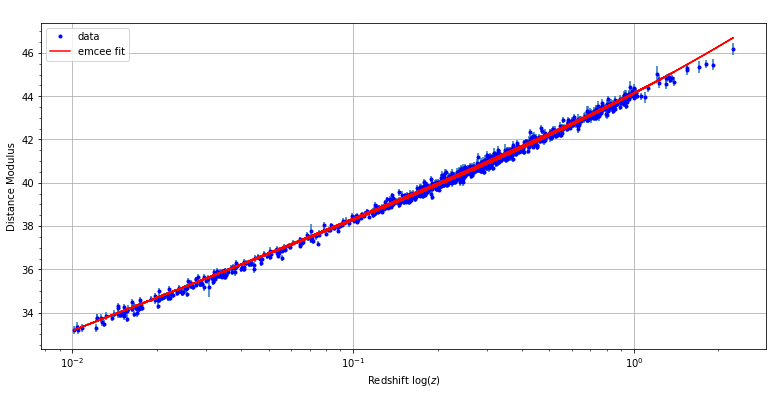

In [324]:
plt.figure(figsize=[13,6])

result_emcee.plot_fit(datafmt='b.',fitfmt='r-', title=' ')
result_emcee.plot_fit(datafmt=' ', fitfmt=' ', yerr=data['dmb'],
                     xlabel='Redshift $\log(z)$', ylabel='Distance Modulus')

#plt.plot(data['zcmb'], model.eval(params=result.params, x=data['zcmb']), '--', label='Nelder')

labels=['data','emcee fit']
plt.legend(labels)
plt.grid()
plt.minorticks_on()
plt.xscale('log')

plt.savefig('emcee_fit.png')
plt.show()

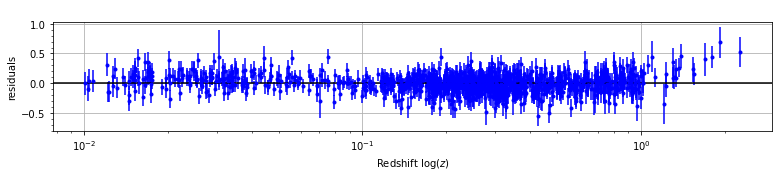

In [325]:
plt.figure(figsize=[12.9,2])
result_emcee.plot_residuals(title = ' ',yerr=data['dmb'],datafmt='b.')
plt.minorticks_on()
plt.grid()
plt.xscale('log')
plt.xlabel('Redshift $\log(z)$')
plt.savefig('emcee_resid.png')
plt.show()

Text(0, 0.5, 'acceptance fraction')

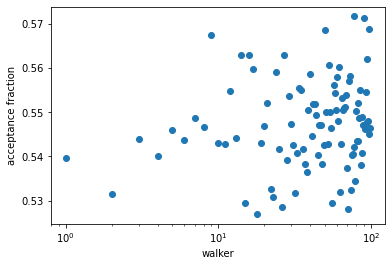

In [326]:
plt.plot(result_emcee.acceptance_fraction, 'o')
plt.xscale('log')
plt.xlabel('walker')
plt.ylabel('acceptance fraction')

In [327]:
if hasattr(result_emcee, "acor"):
    print("Autocorrelation time for the parameters:")
    print("----------------------------------------")
    for i, p in enumerate(result.params):
        print(f'{p} = {result_emcee.acor[i]:.3f}')

Autocorrelation time for the parameters:
----------------------------------------
H0 = 47.718
Om = 56.392
Ol = 55.267


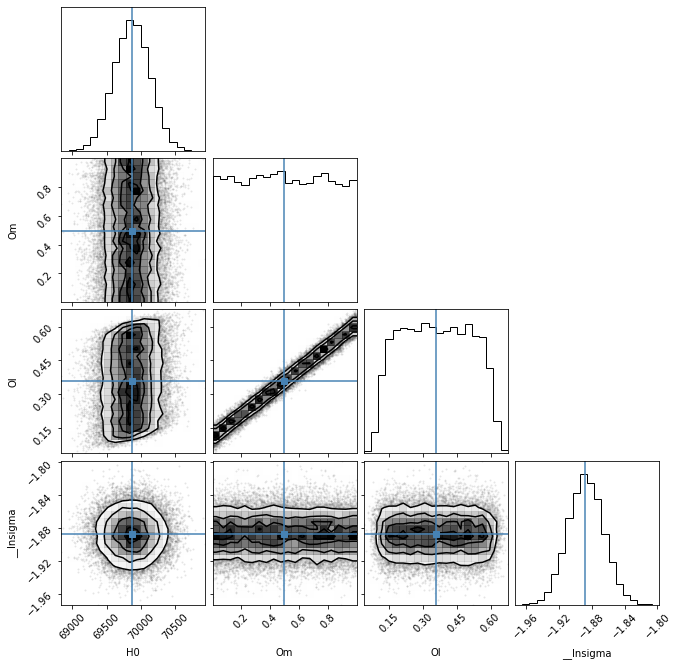

In [328]:
emcee_corner = corner.corner(result_emcee.flatchain, labels=result_emcee.var_names,
                             truths=list(result_emcee.params.valuesdict().values()))
#plt.savefig('corner_plot.png')
plt.show()

In [329]:
print("\nmedian of posterior probability distribution")
print('--------------------------------------------')
lmfit.report_fit(result_emcee.params)


median of posterior probability distribution
--------------------------------------------
[[Variables]]
    H0:         69865.3083 +/- 262.954531 (0.38%) (init = 69861.76)
    Om:         0.49346782 +/- 0.33977878 (68.86%) (init = 0.4032791)
    Ol:         0.35792648 +/- 0.16979419 (47.44%) (init = 0.3118055)
    __lnsigma: -1.88764093 +/- 0.02151244 (1.14%) (init = -2.302585)
[[Correlations]] (unreported correlations are < 0.100)
    C(Om, Ol) = 0.986
    C(H0, Ol) = 0.135


In [305]:
result_emcee.params['Om'].value, result_emcee.params['Ol'].value

(0.5058042210867553, 0.3642078687992801)

In [293]:
highest_prob = np.argmax(result_emcee.lnprob)
hp_loc = np.unravel_index(highest_prob, result_emcee.lnprob.shape)
mle_soln = result_emcee.chain[hp_loc]
print("\nMaximum Likelihood Estimation (MLE):")
print('----------------------------------')
for ix, param in enumerate(emcee_params):
    print(f"{param}: {mle_soln[ix]:.3f}")

#quantiles = np.percentile(result_emcee.flatchain['t1'], [2.28, 15.9, 50, 84.2, 97.7])
#print(f"\n\n1 sigma spread = {0.5 * (quantiles[3] - quantiles[1]):.3f}")
#print(f"2 sigma spread = {0.5 * (quantiles[4] - quantiles[0]):.3f}")


Maximum Likelihood Estimation (MLE):
----------------------------------
H0: 69878.682
Om: 0.276
Ol: 0.250
__lnsigma: -1.889


### Take 2

This time we will be using the emcee tutorial from [readthedocs.io](https://emcee.readthedocs.io/en/stable/tutorials/line/).

In [744]:
c = 3e8 # speed of light constant

# Defining our equations
def q0(Om, Ol): # equation 6.11 in text
    return (1/2) * Om - Ol

def d_l(x, H0, Om, Ol): # equation 6.31 in text
    return ((c*x)/H0) * (1 + (1-q0(Om, Ol)) * x/2)

def distance_modulus(x, H0, Om): # equation 6.49 in text
    Ol = 1 - Om
    return(5*np.log10(d_l(x, H0, Om, Ol))) + 25

In [740]:
from astropy.cosmology import LambdaCDM

LambdaCDM?

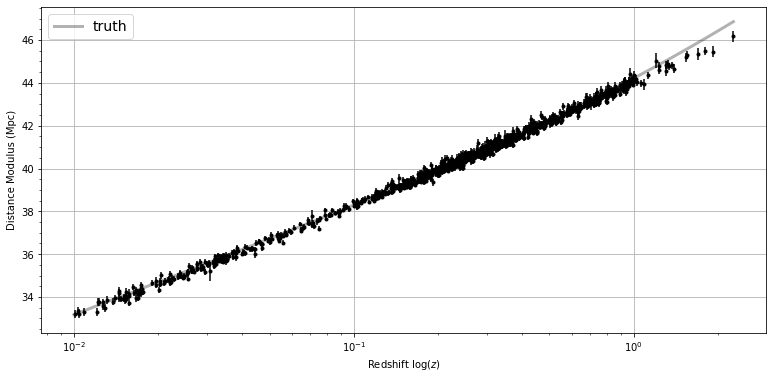

In [746]:
y = DM
yerr = data['dmb']
x = data['zcmb']

x0 = np.linspace(0.01, 2.27, 500)

# initial values we will be compairing
H0=70000
Om=0.5
Ol=1 - Om

# creating the figure
plt.figure(figsize=[13,6])
plt.errorbar(x = x, y = y, yerr = yerr, fmt='.', color='black')
plt.plot(x0, distance_modulus(x0, H0, Om), "k", alpha=0.3, lw=3, label="truth")
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Redshift $\log(z)$')
plt.ylabel('Distance Modulus (Mpc)')
plt.minorticks_on()
plt.xscale('log')
plt.show()

Least-squares estimates:
H0 = 69861.760 ± 258.564
Om = 0.593 ± 0.016
Ol = 0.407 ± 0.016


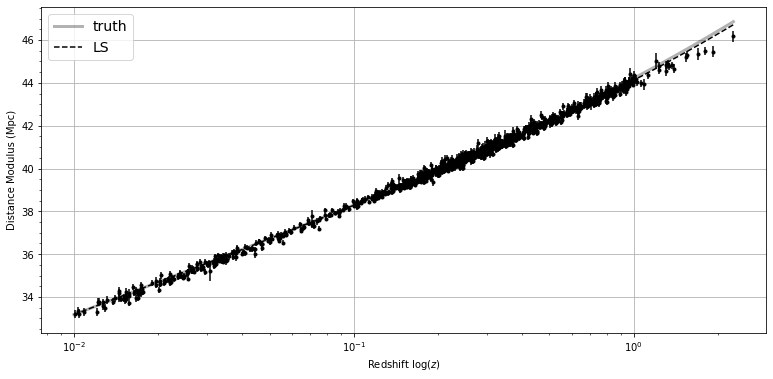

In [747]:
# using optimize.curve_fit to find inital values for H0, Om, Ol

fit, pcov = optimize.curve_fit(distance_modulus, xdata = x, ydata = y, bounds=([60000,0],[80000,1]))
err = np.sqrt(np.diag(pcov)) # finds the error after doing least_squares

print("Least-squares estimates:")
print("H0 = {0:.3f} ± {1:.3f}".format(fit[0], err[0]))
print("Om = {0:.3f} ± {1:.3f}".format(fit[1], err[1]))
print("Ol = {0:.3f} ± {1:.3f}".format(1 - fit[1], err[1]))

plt.figure(figsize=[13,6])
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, distance_modulus(x0, H0, Om), "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, distance_modulus(x0, fit[0], fit[1]), "--k", label="LS")
plt.legend(fontsize=14)
plt.minorticks_on()
plt.grid()
plt.ylabel('Distance Modulus (Mpc)')
plt.xlabel('Redshift $\log(z)$')
plt.xscale('log');

In [748]:
chi_squared(distance_modulus, DM, data['dmb'], [data['zcmb'], 70000, .3])

1968.7940059635291

In [749]:
def chi_squared(modle, measured, error, args):
    top = (measured - modle(*args))**2
    bot = error**2
    return (np.sum(top/bot))

In [750]:
def log_likelihood(theta, x, y, yerr):
    H0, Om = theta
    model = distance_modulus(x, Om, H0)
    sigma2 = yerr ** 2 + model ** 2 #* np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))


#    return chi_squared(model, y, yerr, [data['zcmb'], H0, Om, Ol])

In [751]:
#log_likelihood([H0_fit, Om_fit, Ol_fit, log_f_ml], data['zcmb'], DM, data['dmb'])

/Users/felix/anaconda3/envs/grizli/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Maximum likelihood estimates:
H0 = 70000.050
Om = 0.486
Ol = 0.565


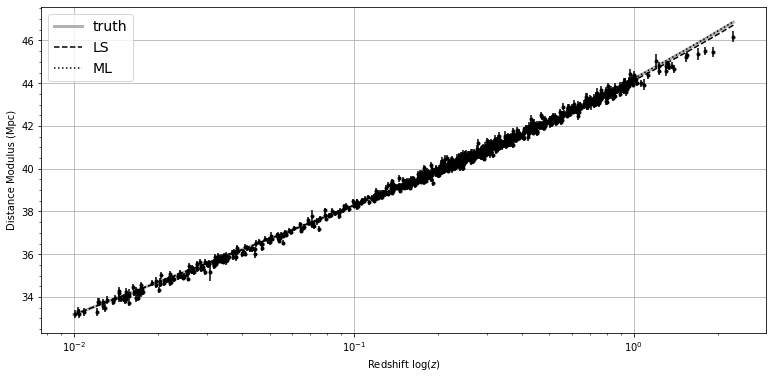

In [753]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([H0, Om]) + 0.1 * np.random.randn(2)
soln = minimize(nll, initial, args=(x, y, yerr))
H0_ml, Om_ml  = soln.x

print("Maximum likelihood estimates:")
print("H0 = {0:.3f}".format(H0_ml))
print("Om = {0:.3f}".format(Om_ml))
print("Ol = {0:.3f}".format(Ol_ml))

plt.figure(figsize=[13,6])
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, distance_modulus(x0, H0, Om), "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, distance_modulus(x0, fit[0], fit[1]), "--k", label="LS")
plt.plot(x0, distance_modulus(x0, H0_ml, Om_ml), ":k", label="ML")
plt.legend(fontsize=14)

plt.minorticks_on()
plt.grid()
plt.xscale('log')
plt.ylabel('Distance Modulus (Mpc)')
plt.xlabel('Redshift $\log(z)$');

In [757]:
def log_prior(theta):
    H0, Om = theta
    if 60000 < H0 < 80000 and 0.0 < Om < 1.0:
        return 0.0
    return -np.inf

In [758]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [759]:
import emcee

pos = soln.x + 1e-4 * np.random.randn(32, 2)

#pos = [soln.x + 1e-4 * np.random.randn(ndim) for i in range(nwalkers)] 
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 500, progress=True);

/Users/felix/anaconda3/envs/grizli/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|██████████| 500/500 [00:15<00:00, 31.77it/s]


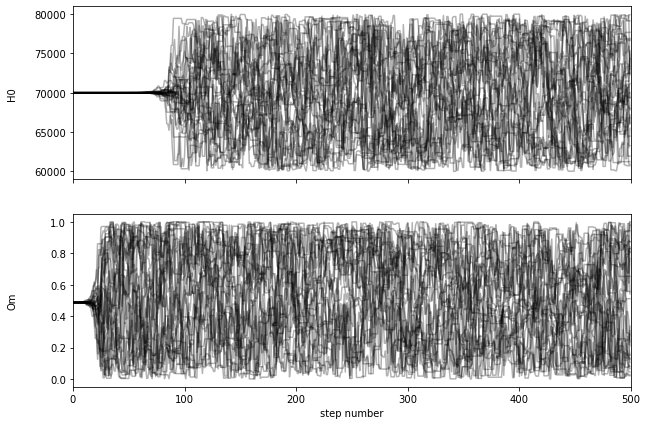

In [760]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["H0", "Om"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [761]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 2 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [19.56051754 26.20931961]

In [762]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(832, 2)


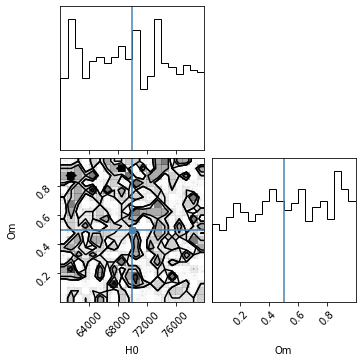

In [763]:
import corner

fig = corner.corner(flat_samples, labels=labels, truths=[H0, Om]);

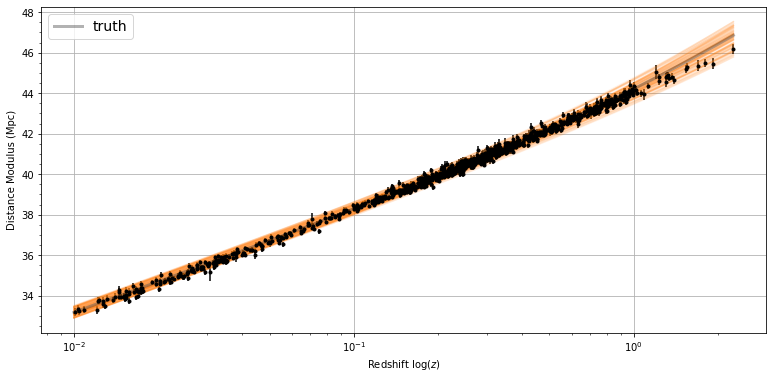

In [766]:
inds = np.random.randint(len(flat_samples), size=100)

plt.figure(figsize=[13,6])
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, distance_modulus(x0, sample[0], sample[1]), "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, distance_modulus(x0, H0, Om), "k", alpha=0.3, lw=3, label="truth")

plt.legend(fontsize=14)
plt.minorticks_on()
plt.grid()
plt.xscale('log')
plt.ylabel('Distance Modulus (Mpc)')
plt.xlabel('Redshift $\log(z)$');

In [767]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### The Chi-Squared equation is
$$
    \chi^2 = \sum_i \frac{(\mu_i - \mu(z_i))^2}{a_i^2}
$$

Where $a_i^2$ is our error squared (or `dmb`^2 in this example), $\mu_i$ are our observed values (The data points found in figure 1), and $\mu(z_i)$ are our expected values (the values we recieve after fitting the data).

In [768]:
def chi_squared(modle, measured, error, args):
    top = (measured - modle(*args))**2
    bot = error**2
    return (np.sum(top/bot))

In [771]:
# variables for chi_squared
H0_fit = np.percentile(flat_samples[:,0],50)
Om_fit = np.percentile(flat_samples[:,1],50)

chi_squared(distance_modulus, DM, data['dmb'], [data['zcmb'], H0_fit, Om_fit])

1167.601630659471